In [1]:
# Import Library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train  dataset:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
# Showing 5 raws of train data:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Number of rows and columns
df.shape

(7043, 21)

In [5]:
# Information about full data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking the missing values:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Here seen columns names:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Here dropping NaN values from the data:
df.dropna(inplace=True,subset=["TotalCharges"])

In [9]:
# Here checking any duplicates data:
df.duplicated().sum()

0

In [10]:
# Hrer Converting yes/no to 1/0 values with LabelEncoder:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
to_label = ["Churn","PhoneService","OnlineSecurity","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]
for label in to_label:
    new_column_name = f"{label}_Labeled"
    df[new_column_name] = lb.fit_transform(df[label])

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Churn_Labeled,PhoneService_Labeled,OnlineSecurity_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,PaperlessBilling_Labeled
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0,0,0,0,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.5,No,0,1,2,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,1,1,2,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0,0,2,2,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,1,1,0,0,0,0,1


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Labeled,PhoneService_Labeled,OnlineSecurity_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,PaperlessBilling_Labeled
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,0.903166,0.790004,0.797104,0.985376,0.992475,0.592219
std,0.368612,24.559481,30.090047,0.441561,0.295752,0.859848,0.861551,0.885002,0.885091,0.491457
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


#### Data Visualization

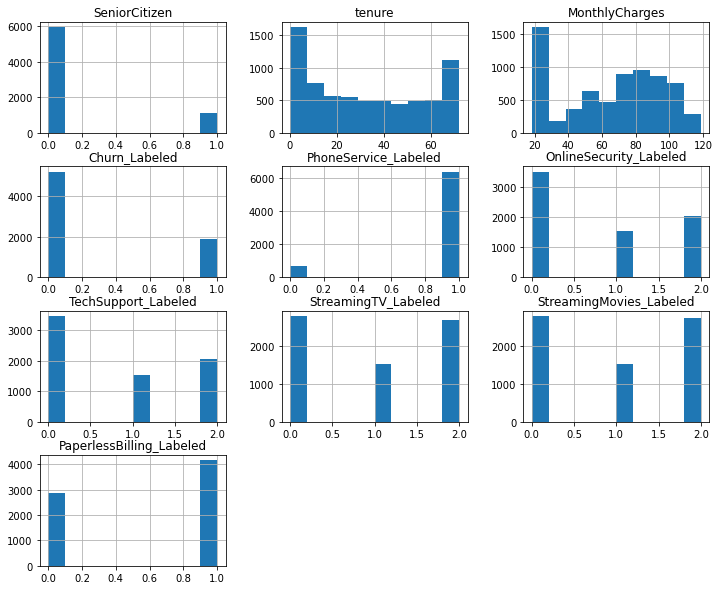

In [13]:
# display histogram:
df.hist(figsize=(12,10), layout=(4,3), sharex=False);

<AxesSubplot:xlabel='Churn', ylabel='count'>

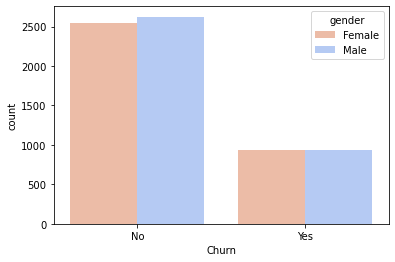

In [14]:
# display countplot for female and male in churn:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

<AxesSubplot:xlabel='Churn', ylabel='count'>

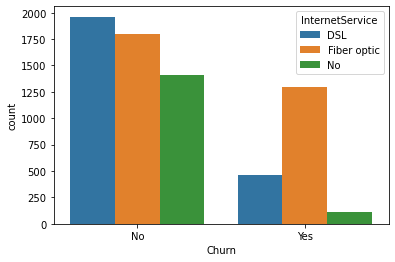

In [15]:
# display countplot for InternetService in churn:
sns.countplot(x='Churn',data=df, hue='InternetService')

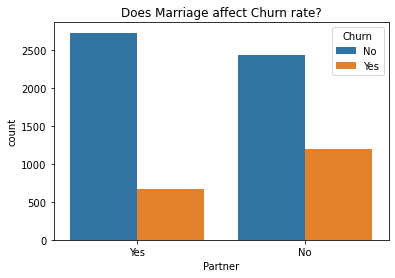

In [16]:
# display countplot for Partner vs Churn:
fig_churn_partner = sns.countplot(x="Partner",hue="Churn",data=df)
fig_churn_partner.set_title("Does Marriage affect Churn rate?")
plt.show()

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

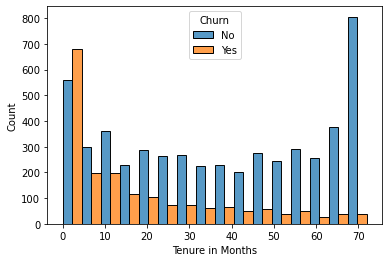

In [17]:
# display histplot for tenure in Churn:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

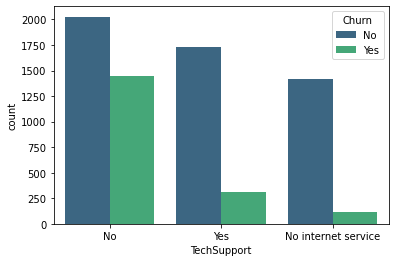

In [18]:
# display countplot for TechSuppor in churn:
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

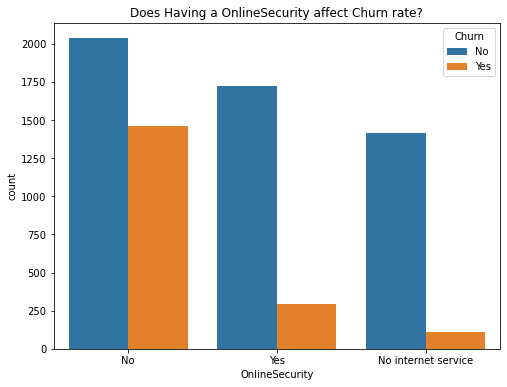

In [19]:
# OnlineSecurity vs Churn
f, ax = plt.subplots(figsize=(8,6))
fig_churn_phone_service = sns.countplot(x="OnlineSecurity",hue="Churn",data=df)
fig_churn_phone_service.set_title("Does Having a OnlineSecurity affect Churn rate?")
plt.show()

In [20]:
# Correlation of data:
corr = df.corr(method='pearson')
corr

,SeniorCitizen,tenure,MonthlyCharges,Churn_Labeled,PhoneService_Labeled,OnlineSecurity_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,PaperlessBilling_Labeled
SeniorCitizen,1.000000,0.016567,0.220173,0.150889,0.008576,-0.128221,-0.151268,0.030776,0.047266,0.156530
tenure,0.016567,1.000000,0.247900,-0.352229,0.008448,0.325468,0.322942,0.289373,0.296866,0.006152
MonthlyCharges,0.220173,0.247900,1.000000,0.193356,0.247398,-0.053878,-0.008682,0.336706,0.335459,0.352150
Churn_Labeled,0.150889,-0.352229,0.193356,1.000000,0.011942,-0.289309,-0.282492,-0.036581,-0.038492,0.191825
PhoneService_Labeled,0.008576,0.008448,0.247398,0.011942,1.000000,-0.015198,-0.019158,0.055353,0.043870,0.016505
OnlineSecurity_Labeled,-0.128221,0.325468,-0.053878,-0.289309,-0.015198,1.000000,0.285028,0.044669,0.055954,-0.157641
TechSupport_Labeled,-0.151268,0.322942,-0.008682,-0.282492,-0.019158,0.285028,1.000000,0.161305,0.161316,-0.113600
StreamingTV_Labeled,0.030776,0.289373,0.336706,-0.036581,0.055353,0.044669,0.161305,1.000000,0.434772,0.096642
StreamingMovies_Labeled,0.047266,0.296866,0.335459,-0.038492,0.043870,0.055954,0.161316,0.434772,1.000000,0.083700
PaperlessBilling_Labeled,0.156530,0.006152,0.352150,0.191825,0.016505,-0.157641,-0.113600,0.096642,0.083700,1.000000


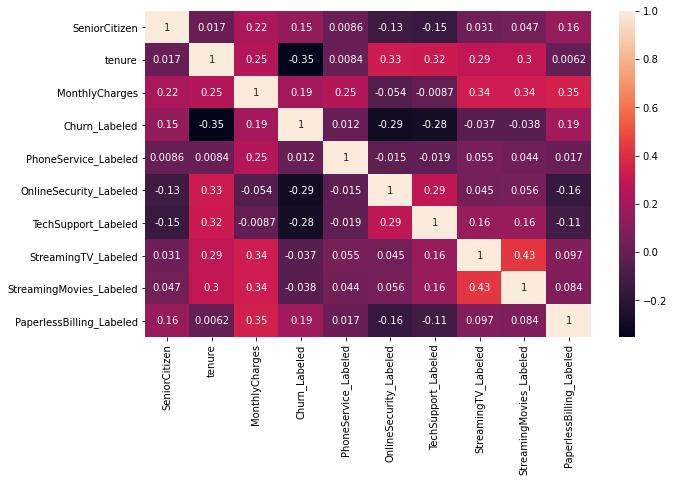

In [21]:
# display heatmap:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True);

In [22]:
new_df = df.copy() # make copy of df
new_df.drop(columns=['Churn_Labeled', 'PhoneService_Labeled', 'OnlineSecurity_Labeled',
       'TechSupport_Labeled', 'StreamingTV_Labeled', 'StreamingMovies_Labeled',
       'PaperlessBilling_Labeled'],inplace=True) # drop not needed cols

# Label Encoding
to_label = new_df.columns
for label in to_label:
    new_column_name = f"{label}_Labeled"
    new_df[new_column_name] = lb.fit_transform(new_df[label])

In [23]:
# Hrer Feature selection:   
X = new_df[['SeniorCitizen_Labeled', 'Partner_Labeled',
       'Dependents_Labeled', 'tenure_Labeled', 'PhoneService_Labeled',
       'MultipleLines_Labeled', 'InternetService_Labeled',
       'OnlineSecurity_Labeled', 'OnlineBackup_Labeled',
       'DeviceProtection_Labeled', 'TechSupport_Labeled',
       'StreamingTV_Labeled', 'StreamingMovies_Labeled', 'Contract_Labeled',
       'PaperlessBilling_Labeled', 'PaymentMethod_Labeled',
       'MonthlyCharges_Labeled', 'TotalCharges_Labeled']]
y = new_df["Churn_Labeled"]

In [24]:
print(X)
print(y)

      SeniorCitizen_Labeled  Partner_Labeled  Dependents_Labeled  \
0                         0                1                   0   
1                         0                0                   0   
2                         0                0                   0   
3                         0                0                   0   
4                         0                0                   0   
...                     ...              ...                 ...   
7038                      0                1                   1   
7039                      0                1                   1   
7040                      0                1                   1   
7041                      1                1                   0   
7042                      0                0                   0   

      tenure_Labeled  PhoneService_Labeled  MultipleLines_Labeled  \
0                  1                     0                      1   
1                 34                     1   

#### Split datasets into train and test

In [25]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#### Here Creating Model:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.804
Acc on test data: 0.794


In [27]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print("Acc on training data: {:,.3f}".format(xgb_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(xgb_model.score(X_test, y_test)))
# print(accuracy_score(y_test, prediction_xgb))

[23:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acc on training data: 0.950
Acc on test data: 0.769


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.997
Acc on test data: 0.769


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Acc on:",metrics.accuracy_score(y_test, y_pred))

Acc on: 0.7368670137245622


#### Model Evaluation:

In [30]:
# Carting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, prediction1))

[[1353  178]
 [ 311  271]]


In [31]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1531
           1       0.60      0.47      0.53       582

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [32]:
# here doing Cross validated:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5)
scores

array([0.80340667, 0.79488999, 0.7828247 , 0.8046875 , 0.80397727])

In [33]:
# Creating the hyperparameter grid:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
c_space = np.logspace(-5, 5, 8)
param_grid = {'C': c_space}
lr= LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
lr_cv.fit(X,y)
print("Tuned DecisionTreeClassifier: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned DecisionTreeClassifier: {'C': 0.19306977288832497}
Best score is 0.8010809165107426


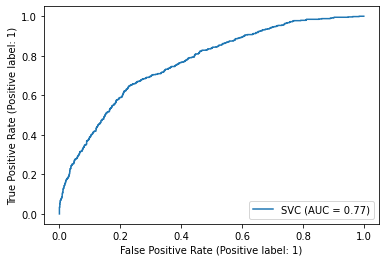

In [34]:
# here ploting roc_curve :
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
lr = svm.SVC(random_state=0)
lr.fit(X_train, y_train)
metrics.plot_roc_curve(lr, X_test, y_test) 
plt.show()

In [35]:
# save the model:
import pickle
file = 'Customer Churn Analysis'
#save file
save = pickle.dump(model,open(file,'wb'))